In [56]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
from sklearn.feature_selection import mutual_info_classif

import seaborn as sns
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt


In [57]:
original =pd.read_csv('dataset.csv')
df=original.copy()

/var/folders/32/01d39x_s1sn9ywcywln8d29r0000gn/T/ipykernel_39928/2487470730.py:1: DtypeWarning: Columns (3,4,5) have mixed types. Specify dtype option on import or set low_memory=False.
  original =pd.read_csv('dataset.csv')


In [58]:
df.head()

,id,spkid,full_name,pdes,name,prefix,neo,pha,H,diameter,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,Ceres,NaN,N,N,3.40,939.400,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,Pallas,NaN,N,N,4.20,545.000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,Juno,NaN,N,N,5.33,246.596,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,Vesta,NaN,N,N,3.00,525.400,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,Astraea,NaN,N,N,6.90,106.699,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191


In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 958524 entries, 0 to 958523
Data columns (total 45 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id              958524 non-null  object 
 1   spkid           958524 non-null  int64  
 2   full_name       958524 non-null  object 
 3   pdes            958524 non-null  object 
 4   name            22064 non-null   object 
 5   prefix          18 non-null      object 
 6   neo             958520 non-null  object 
 7   pha             938603 non-null  object 
 8   H               952261 non-null  float64
 9   diameter        136209 non-null  float64
 10  albedo          135103 non-null  float64
 11  diameter_sigma  136081 non-null  float64
 12  orbit_id        958524 non-null  object 
 13  epoch           958524 non-null  float64
 14  epoch_mjd       958524 non-null  int64  
 15  epoch_cal       958524 non-null  float64
 16  equinox         958524 non-null  object 
 17  e         

## Data Preprocessing

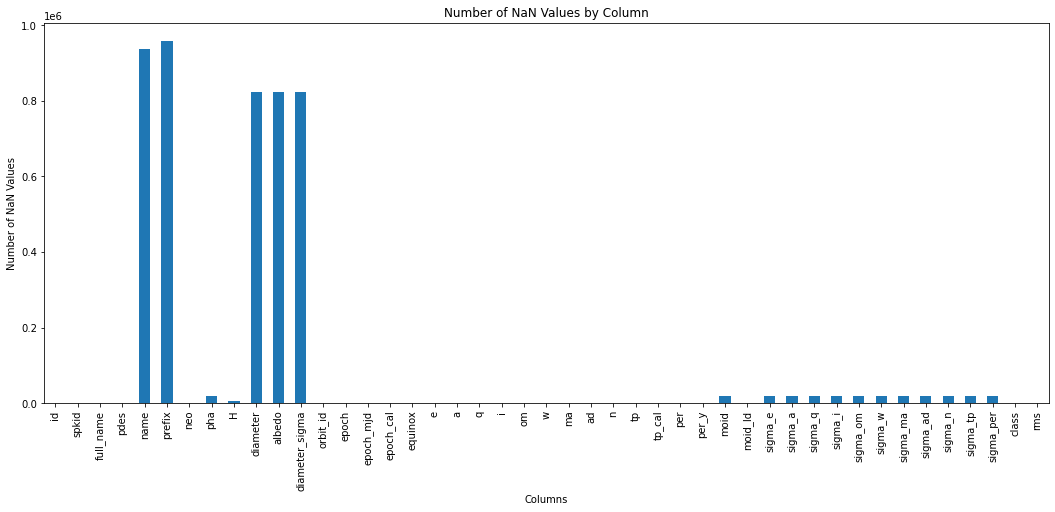

In [60]:
nan_counts = df.isnull().sum()

# create a bar chart of the NaN counts
plt.figure(figsize=(18, 7))
nan_counts.plot(kind='bar')
plt.title('Number of NaN Values by Column')
plt.xlabel('Columns')
plt.ylabel('Number of NaN Values')
plt.show()


In [61]:
# Columns with missing values in Perentage
missing_cols = df.isna().mean() * 100
missing_cols = missing_cols[missing_cols > 0]
print("Percentage of missing values:\n", missing_cols)

Percentage of missing values:
 name              97.698128
prefix            99.998122
neo                0.000417
pha                2.078300
H                  0.653400
diameter          85.789714
albedo            85.905100
diameter_sigma    85.803068
ma                 0.000104
ad                 0.000417
per                0.000417
per_y              0.000104
moid               2.078300
moid_ld            0.013250
sigma_e            2.078404
sigma_a            2.078404
sigma_q            2.078404
sigma_i            2.078404
sigma_om           2.078404
sigma_w            2.078404
sigma_ma           2.078404
sigma_ad           2.078821
sigma_n            2.078404
sigma_tp           2.078404
sigma_per          2.078821
rms                0.000209
dtype: float64


 #### 1.Dropping columns  which has more than 80% Missing Values
 #### 2.For Columns which has around 2% missing values, we/ are gonna fill them with Random Sample Imputation


In [62]:
# Columns Dropped
df=df.drop(labels=['prefix','name','diameter','albedo','diameter_sigma','name','prefix'], axis=1)


# Random Sample Imputation
def imputer_New(df):
    for col in df.columns:
        if df[col].isnull().sum() > 0:
            random_sample = df[col].dropna().sample(df[col].isnull().sum(),
                                                    random_state=69, replace=True)
            random_sample.index = df[df[col].isnull()].index
            df.loc[df[col].isnull(), col] = random_sample
    return df


imputer_New(df)


,id,spkid,full_name,pdes,neo,pha,H,orbit_id,epoch,epoch_mjd,...,sigma_i,sigma_om,sigma_w,sigma_ma,sigma_ad,sigma_n,sigma_tp,sigma_per,class,rms
0,a0000001,2000001,1 Ceres,1,N,N,3.400,JPL 47,2458600.5,58600,...,4.608900e-09,6.168800e-08,6.624800e-08,7.820700e-09,1.111300e-11,1.196500e-12,3.782900e-08,9.415900e-09,MBA,0.43301
1,a0000002,2000002,2 Pallas,2,N,N,4.200,JPL 37,2459000.5,59000,...,3.469400e-06,6.272400e-06,9.128200e-06,8.859100e-06,4.961300e-09,4.653600e-10,4.078700e-05,3.680700e-06,MBA,0.35936
2,a0000003,2000003,3 Juno,3,N,N,5.330,JPL 112,2459000.5,59000,...,3.223100e-06,1.664600e-05,1.772100e-05,8.110400e-06,4.363900e-09,4.413400e-10,3.528800e-05,3.107200e-06,MBA,0.33848
3,a0000004,2000004,4 Vesta,4,N,N,3.000,JPL 35,2458600.5,58600,...,2.170600e-07,3.880800e-07,1.789300e-07,1.206800e-06,1.648600e-09,2.612500e-10,4.103700e-06,1.274900e-06,MBA,0.39980
4,a0000005,2000005,5 Astraea,5,N,N,6.900,JPL 114,2459000.5,59000,...,2.740800e-06,2.894900e-05,2.984200e-05,8.303800e-06,4.729000e-09,5.522700e-10,3.474300e-05,3.490500e-06,MBA,0.52191
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
958519,bPLS6013,3246801,(6013 P-L),6013 P-L,N,N,17.135,JPL 5,2437203.5,37203,...,6.969000e+00,7.433000e+00,4.631100e+01,2.738300e+01,1.041200e+00,1.652100e-01,1.309700e+02,7.264900e+02,MBA,0.23839
958520,bPLS6331,3246834,(6331 P-L),6331 P-L,N,N,18.500,8,2459000.5,59000,...,1.563500e-05,5.598600e-05,2.380400e-04,1.298200e-04,2.418900e-08,3.346100e-09,4.690200e-04,1.578500e-05,MBA,0.53633
958521,bPLS6344,3013075,(6344 P-L),6344 P-L,Y,Y,20.400,17,2459000.5,59000,...,1.853300e-05,5.691700e-05,8.969200e-05,5.272600e-05,1.650100e-07,1.101600e-08,2.830600e-04,9.127500e-05,APO,0.51556
958522,bT2S2060,3246457,(2060 T-2),2060 T-2,N,N,18.071,JPL 3,2441956.5,41956,...,5.448800e-01,4.391600e+00,1.898800e+01,1.083800e+01,7.171600e-01,1.016700e-01,3.898400e+01,5.035500e+02,MBA,0.25641


In [64]:
# Converting pha into 0 and 1, Since Ml Algorithms work much better on Numerical Values, 0 would be indicating that the asteroid is not harmful and 1 would indicate it is harmful
df['pha'] = df['pha'].map({

    'N': 0,
    'Y': '1'
})

# Converting Object to String
df['pha'] = df['pha'].astype(int)

# Segregating Categorical and Numerical Columns
df_categorical = df.select_dtypes(include='object')
df_numerical=df.select_dtypes(include='number')


In [65]:
df_categorical.head()


,id,full_name,pdes,neo,orbit_id,equinox,class
0,a0000001,1 Ceres,1,N,JPL 47,J2000,MBA
1,a0000002,2 Pallas,2,N,JPL 37,J2000,MBA
2,a0000003,3 Juno,3,N,JPL 112,J2000,MBA
3,a0000004,4 Vesta,4,N,JPL 35,J2000,MBA
4,a0000005,5 Astraea,5,N,JPL 114,J2000,MBA


In [66]:
df.pdes.unique()

array([1, 2, 3, ..., '6344 P-L', '2060 T-2', '2678 T-3'], dtype=object)

## Feature Engineering

### Important Features

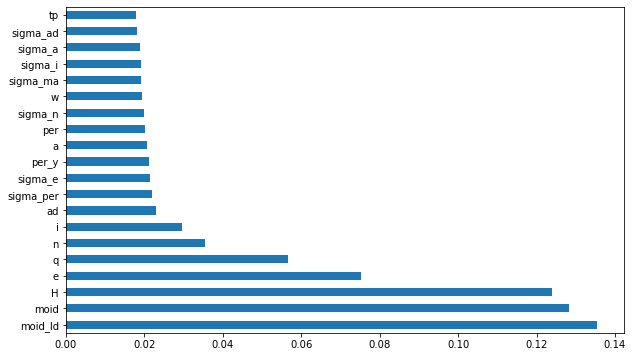

In [41]:
X = df_numerical.drop(['spkid'], axis=1)
y = df.iloc[:]['pha']

def ETC(number):
    model = ExtraTreesClassifier()
    model.fit(X, y)
    ranked_features = pd.Series(model.feature_importances_, index=X.columns)
    plt.figure(figsize=(10, 6))
    ranked_features.nlargest(number).plot(kind='barh')
    
    plt.show()


ETC(20)
